In [1]:
import pandas as pd
import pickle

In [2]:
from __future__ import division
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

warnings.filterwarnings("ignore", category=DeprecationWarning)
sns.set_style("whitegrid")
sns.set_context("poster")
# rcParams['figure.figsize'] = 20, 5

In [3]:
def need_more_alphas(result_table):
    """Make sure we don't need to look at more alphas,
    by checking that min and max alphas don't correspond to the highest score."""
    scores = result_table.loc['mean_test_score'].tolist()
    highest_score = max(scores)
    
    if scores[0] == highest_score:
        return True
    elif scores[-1] == highest_score:
        if scores[-1] == scores[-2]:
            return False
        else:
            return True
    else:
        return False

In [4]:
results = pickle.load(open('../data/lasso_q2_ea_model_results.pkl', 'rb'))
len(results)

125

### Looking at if I need more alphas

In [6]:
results.values()[19]['result'].loc['mean_test_score']

0      -0.727651
1       -0.67573
2      -0.562566
3      -0.338584
4     -0.0574087
5      0.0984544
6       0.169834
7    -0.00484897
8    -0.00868369
9    -0.00868369
10   -0.00868369
11   -0.00868369
12   -0.00868369
13   -0.00868369
14   -0.00868369
15   -0.00868369
16   -0.00868369
Name: mean_test_score, dtype: object

In [7]:
need_more_alphas(results.values()[20]['result'])

False

### Looking at best scores

In [5]:
r = {}

for categ, result in results.iteritems():
    r[categ] = result['result'].loc['mean_test_score'].max()

In [6]:
df = pd.DataFrame(sorted(r.items(), key=lambda x: x[1])[::-1], columns=['categ', 'r2'])

In [7]:
df['needs_more_alphas'] = df.categ.map(lambda categ: need_more_alphas(results[categ]['result']))
df.shape

(125, 3)

In [8]:
results['Recycling Cart Return']['result']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
mean_fit_time,0.120379,0.068115,0.0621252,0.0635358,0.0590966,0.0536456,0.0507924,0.0500554,0.0450613,0.0493222,0.048696,0.0462204,0.0530042,0.0525774,0.0455906,0.052766,0.0412407
mean_score_time,0.00336995,0.00281811,0.00290761,0.00239182,0.00227041,0.00231357,0.00231018,0.00411806,0.00231299,0.00236402,0.0023798,0.00234423,0.0025064,0.00229573,0.00239954,0.00244761,0.00211763
mean_test_score,0.42787,0.427949,0.428099,0.428361,0.428808,0.427567,0.405856,0.326244,-0.00231629,-0.00231629,-0.00231629,-0.00231629,-0.00231629,-0.00231629,-0.00231629,-0.00231629,-0.00231629
mean_train_score,0.457179,0.457163,0.456976,0.455776,0.450962,0.441015,0.41259,0.329275,0,0,0,0,0,0,0,0,0
param_lassocv__alphas,[0.0001],[0.0003],[0.001],[0.003],[0.01],[0.03],[0.1],[0.3],[1.0],[3.0],[10.0],[30.0],[100.0],[300.0],[1000.0],[3000.0],[10000.0]
params,{u'lassocv__alphas': [0.0001]},{u'lassocv__alphas': [0.0003]},{u'lassocv__alphas': [0.001]},{u'lassocv__alphas': [0.003]},{u'lassocv__alphas': [0.01]},{u'lassocv__alphas': [0.03]},{u'lassocv__alphas': [0.1]},{u'lassocv__alphas': [0.3]},{u'lassocv__alphas': [1.0]},{u'lassocv__alphas': [3.0]},{u'lassocv__alphas': [10.0]},{u'lassocv__alphas': [30.0]},{u'lassocv__alphas': [100.0]},{u'lassocv__alphas': [300.0]},{u'lassocv__alphas': [1000.0]},{u'lassocv__alphas': [3000.0]},{u'lassocv__alphas': [10000.0]}
rank_test_score,5,4,3,2,1,6,7,8,9,9,9,9,9,9,9,9,9
split0_test_score,0.462282,0.462695,0.464015,0.466922,0.472864,0.46968,0.441226,0.335523,-6.277e-07,-6.277e-07,-6.277e-07,-6.277e-07,-6.277e-07,-6.277e-07,-6.277e-07,-6.277e-07,-6.277e-07
split0_train_score,0.448196,0.448178,0.447982,0.446544,0.440761,0.42879,0.402807,0.31631,0,0,0,0,0,0,0,0,0
split1_test_score,0.389531,0.389472,0.389117,0.389837,0.396451,0.404915,0.392544,0.327582,-0.00254985,-0.00254985,-0.00254985,-0.00254985,-0.00254985,-0.00254985,-0.00254985,-0.00254985,-0.00254985


In [9]:
df1[df.needs_more_alphas]

NameError: name 'df1' is not defined

In [10]:
df_n = pd.DataFrame({'TYPE': {0: 'ADA',
  1: 'Abandoned Bicycle',
  2: 'Abandoned Building',
  3: 'Abandoned Vehicles',
  4: 'Alert Boston',
  5: 'Animal Found',
  6: 'Animal Generic Request',
  7: 'Animal Lost',
  8: 'Animal Noise Disturbances',
  9: 'Automotive Noise Disturbance',
  10: 'BWSC General Request',
  11: 'BWSC Pothole',
  12: 'Bed Bugs',
  13: 'Bicycle Issues',
  14: 'Big Buildings Online Request',
  15: 'Billing Complaint',
  16: 'Breathe Easy',
  17: 'Bridge Maintenance',
  18: 'Building Inspection Request',
  19: 'CE Collection',
  20: 'Call Log',
  21: 'Carbon Monoxide',
  22: 'Catchbasin',
  23: 'Cemetery Maintenance Request',
  24: 'Checkin',
  25: 'Chronic Dampness/Mold',
  26: 'City/State Snow Issues',
  27: 'Construction Debris',
  28: 'Contractor Complaints',
  29: 'Contractors Complaint',
  30: 'Corporate or Community Group Service Day Clean Up',
  31: 'Cross Metering - Sub-Metering',
  32: 'Downed Wire',
  33: 'Dumpster & Loading Noise Disturbances',
  34: 'Egress',
  35: 'Electrical',
  36: 'Empty Litter Basket',
  37: 'Equipment Repair',
  38: 'Exceeding Terms of Permit',
  39: 'Fire Department Request',
  40: 'Fire Hydrant',
  41: 'Fire in Food Establishment',
  42: 'Follow-Up',
  43: 'Food Alert - Confirmed',
  44: 'Food Alert - Unconfirmed',
  45: 'General Comments For An Employee',
  46: 'General Comments For a Program or Policy',
  47: 'General Lighting Request',
  48: 'General Traffic Engineering Request',
  49: 'Graffiti Removal',
  50: 'Ground Maintenance',
  51: 'HP Sign Application New',
  52: 'HP Sign Application Renewal',
  53: 'Heat - Excessive  Insufficient',
  54: 'Heat/Fuel Assistance',
  55: 'Highway Maintenance',
  56: 'Housing Discrimination Intake Form',
  57: 'Idea Collection',
  58: 'Illegal Auto Body Shop',
  59: 'Illegal Dumping',
  60: 'Illegal Occupancy',
  61: 'Illegal Posting of Signs',
  62: 'Illegal Rooming House',
  63: 'Illegal Use',
  64: 'Illegal Vending',
  65: 'Improper Storage of Trash (Barrels)',
  66: 'Install New Lighting',
  67: 'Item Price Missing',
  68: 'Knockdown Replacement',
  69: 'Lead',
  70: 'Litter Basket Maintenance',
  71: 'Loud Parties/Music/People',
  72: 'Maintenance - Homeowner',
  73: 'Maintenance Complaint - Residential',
  74: 'Major System Failure',
  75: 'Mechanical',
  76: 'Mice Infestation - Residential',
  77: 'Misc. Snow Complaint',
  78: 'Missed Trash/Recycling/Yard Waste/Bulk Item',
  79: 'Missing Sign',
  80: 'Mosquitoes (West Nile)',
  81: 'Municipal Parking Lot Complaints',
  82: 'Needle Pickup',
  83: 'New Sign  Crosswalk or Pavement Marking',
  84: 'New Tree Requests',
  85: 'New Tree Warrantee Inspection',
  86: 'News Boxes',
  87: 'No Price on Gas/Wrong Price',
  88: 'No Utilities - Food Establishment - Electricity',
  89: 'No Utilities - Food Establishment - Flood',
  90: 'No Utilities - Food Establishment - Sewer',
  91: 'No Utilities - Food Establishment - Water',
  92: 'No Utilities Residential - Electricity',
  93: 'No Utilities Residential - Gas',
  94: 'No Utilities Residential - Water',
  95: 'No-Tow Complaint Confirmation',
  96: 'Notification',
  97: 'OCR Front Desk Interactions',
  98: 'OCR Metrolist',
  99: 'Occupying W/Out A Valid CO/CI',
  100: 'One Boston Day',
  101: 'Overcrowding',
  102: 'Overflowing or Un-kept Dumpster',
  103: 'PWD Graffiti',
  104: 'Park Improvement Requests',
  105: 'Park Maintenance Requests',
  106: 'Parking Enforcement',
  107: 'Parking Meter Repairs',
  108: 'Parking on Front/Back Yards (Illegal Parking)',
  109: 'Parks General Request',
  110: 'Parks Lighting/Electrical Issues',
  111: 'Pavement Marking Inspection',
  112: 'Pavement Marking Maintenance',
  113: 'Pest Infestation - Residential',
  114: 'Phone Bank Service Inquiry',
  115: 'Pick up Dead Animal',
  116: 'Pigeon Infestation',
  117: 'Planting',
  118: 'Plumbing',
  119: 'Poor Conditions of Property',
  120: 'Poor Ventilation',
  121: 'Private Parking Lot Complaints',
  122: 'Product Short Measure',
  123: 'Protection of Adjoining Property',
  124: 'Public Events Noise Disturbances',
  125: 'Public Works General Request',
  126: 'Rat Bite',
  127: 'Recycling Cart Inquiry',
  128: 'Recycling Cart Return',
  129: 'Rental Unit Delivery Conditions',
  130: 'Request for Litter Basket Installation',
  131: 'Request for Pothole Repair',
  132: 'Request for Recycling Cart',
  133: 'Request for Snow Plowing',
  134: 'Request for Snow Plowing (Emergency Responder)',
  135: 'Requests for Street Cleaning',
  136: 'Requests for Traffic Signal Studies or Reviews',
  137: 'Roadway Flooding',
  138: 'Roadway Repair',
  139: 'Rodent Activity',
  140: 'Rooftop & Mechanical Disturbances',
  141: 'Scale Not Visible',
  142: 'Scanning Overcharge',
  143: 'Schedule a Bulk Item Pickup',
  144: 'Schedule a Bulk Item Pickup SS',
  145: 'Senior Shoveling',
  146: 'Sewage/Septic Back-Up',
  147: 'Short Measure - Gas',
  148: 'Sidewalk Cover / Manhole',
  149: 'Sidewalk Repair',
  150: 'Sidewalk Repair (Make Safe)',
  151: 'Sign Repair',
  152: 'Sign Shop WO',
  153: 'Snow Removal',
  154: 'Snow/Ice Control',
  155: 'Space Savers',
  156: 'Squalid Living Conditions',
  157: 'Sticker Request',
  158: 'Street Light Knock Downs',
  159: 'Street Light Outages',
  160: 'Student Move-in Issues',
  161: 'Student Overcrowding',
  162: 'Traffic Signal Inspection',
  163: 'Traffic Signal Repair',
  164: 'Transfer Not Completed',
  165: 'Transportation General Request',
  166: 'Trash on Vacant Lot',
  167: 'Tree Emergencies',
  168: 'Tree Maintenance Requests',
  169: 'Tree in Park',
  170: 'Undefined Noise Disturbance',
  171: 'Unit Pricing Wrong/Missing',
  172: 'Unsafe Dangerous Conditions',
  173: 'Unsanitary Conditions - Employees',
  174: 'Unsanitary Conditions - Establishment',
  175: 'Unsanitary Conditions - Food',
  176: 'Unsatisfactory Living Conditions',
  177: 'Unsatisfactory Utilities - Electrical  Plumbing',
  178: 'Unshoveled Sidewalk',
  179: 'Upgrade Existing Lighting',
  180: 'Utility Call-In',
  181: 'Utility Casting Repair',
  182: 'Valet Parking Problems',
  183: 'WC Call Log',
  184: 'Walk-In Service Inquiry',
  185: 'Water in Gas - High Priority',
  186: 'Watermain Break',
  187: 'Work Hours-Loud Noise Complaints',
  188: 'Work w/out Permit',
  189: 'Working Beyond Hours',
  190: 'Yardwaste Asian Longhorned Beetle Affected Area',
  191: 'Zoning'},
 'num_issues': {0: 1,
  1: 1115,
  2: 475,
  3: 8275,
  4: 15,
  5: 112,
  6: 1002,
  7: 85,
  8: 49,
  9: 3,
  10: 877,
  11: 86,
  12: 953,
  13: 76,
  14: 35,
  15: 52,
  16: 953,
  17: 52,
  18: 4559,
  19: 12,
  20: 2059,
  21: 84,
  22: 944,
  23: 69,
  24: 33,
  25: 770,
  26: 74,
  27: 168,
  28: 2655,
  29: 1039,
  30: 126,
  31: 648,
  32: 3,
  33: 14,
  34: 206,
  35: 1605,
  36: 4699,
  37: 2557,
  38: 323,
  39: 19,
  40: 790,
  41: 102,
  42: 4,
  43: 340,
  44: 454,
  45: 1800,
  46: 5421,
  47: 1827,
  48: 238,
  49: 16316,
  50: 3469,
  51: 2,
  52: 1,
  53: 2089,
  54: 2,
  55: 1972,
  56: 311,
  57: 6,
  58: 346,
  59: 1150,
  60: 968,
  61: 108,
  62: 545,
  63: 71,
  64: 57,
  65: 6940,
  66: 155,
  67: 41,
  68: 2,
  69: 109,
  70: 401,
  71: 19,
  72: 451,
  73: 666,
  74: 2137,
  75: 120,
  76: 1004,
  77: 1474,
  78: 40529,
  79: 1990,
  80: 64,
  81: 27,
  82: 1683,
  83: 3951,
  84: 2028,
  85: 1,
  86: 3,
  87: 47,
  88: 16,
  89: 19,
  90: 23,
  91: 22,
  92: 172,
  93: 66,
  94: 295,
  95: 591,
  96: 4599,
  97: 4335,
  98: 25,
  99: 54,
  100: 12,
  101: 110,
  102: 1418,
  103: 1594,
  104: 202,
  105: 395,
  106: 27284,
  107: 322,
  108: 243,
  109: 812,
  110: 991,
  111: 131,
  112: 420,
  113: 800,
  114: 51,
  115: 7400,
  116: 135,
  117: 48,
  118: 471,
  119: 3813,
  120: 25,
  121: 16,
  122: 16,
  123: 425,
  124: 2,
  125: 2089,
  126: 44,
  127: 867,
  128: 1986,
  129: 133,
  130: 525,
  131: 12854,
  132: 13187,
  133: 49135,
  134: 1303,
  135: 20238,
  136: 1186,
  137: 59,
  138: 737,
  139: 10243,
  140: 15,
  141: 5,
  142: 39,
  143: 62975,
  144: 20925,
  145: 2,
  146: 145,
  147: 127,
  148: 893,
  149: 1391,
  150: 11082,
  151: 7271,
  152: 18,
  153: 66,
  154: 20,
  155: 1633,
  156: 189,
  157: 10465,
  158: 1981,
  159: 21953,
  160: 358,
  161: 39,
  162: 2310,
  163: 9967,
  164: 1,
  165: 1106,
  166: 1060,
  167: 4531,
  168: 10931,
  169: 141,
  170: 8,
  171: 22,
  172: 2579,
  173: 192,
  174: 1546,
  175: 881,
  176: 11197,
  177: 266,
  178: 1906,
  179: 118,
  180: 2839,
  181: 1,
  182: 26,
  183: 8,
  184: 17,
  185: 14,
  186: 230,
  187: 825,
  188: 2395,
  189: 608,
  190: 6,
  191: 278}})

In [11]:
df1 = df.merge(df_n, left_on='categ', right_on='TYPE', how='left').drop('TYPE', axis=1)

In [12]:
df1.categ.head(10).tolist()

['Recycling Cart Return',
 'Recycling Cart Inquiry',
 'Misc. Snow Complaint',
 'Request for Snow Plowing',
 'Notification',
 'Illegal Auto Body Shop',
 'Request for Snow Plowing (Emergency Responder)',
 'Empty Litter Basket',
 'Electrical',
 'Needle Pickup']

In [13]:
from __future__ import division

def adj_r2(r2, n, p):
    aa = (n - 1) / (n - p - 1)
    bb = 1 - r2
    return 1 - bb * aa

In [6]:
adj_r2(0.54159918297330223, 101731, 252)

0.5404608376581529

In [7]:
adj_r2(0.428383, 101731, 1986)

0.41700154986766114

In [8]:
adj_r2(	0.410935, 101731, 867)

0.40587150441688247

In [50]:
df1

,categ,r2,needs_more_alphas,num_issues
0,Recycling Cart Return,0.428383,False,1986
1,Recycling Cart Inquiry,0.410935,False,867
2,Misc. Snow Complaint,0.390456,False,1474
3,Request for Snow Plowing,0.370721,False,49135
4,Notification,0.368601,False,4599
5,Illegal Auto Body Shop,0.350456,False,346
6,Request for Snow Plowing (Emergency Responder),0.312560,False,1303
7,Empty Litter Basket,0.296070,False,4699
8,Electrical,0.290328,False,1605
9,Needle Pickup,0.263681,False,1683


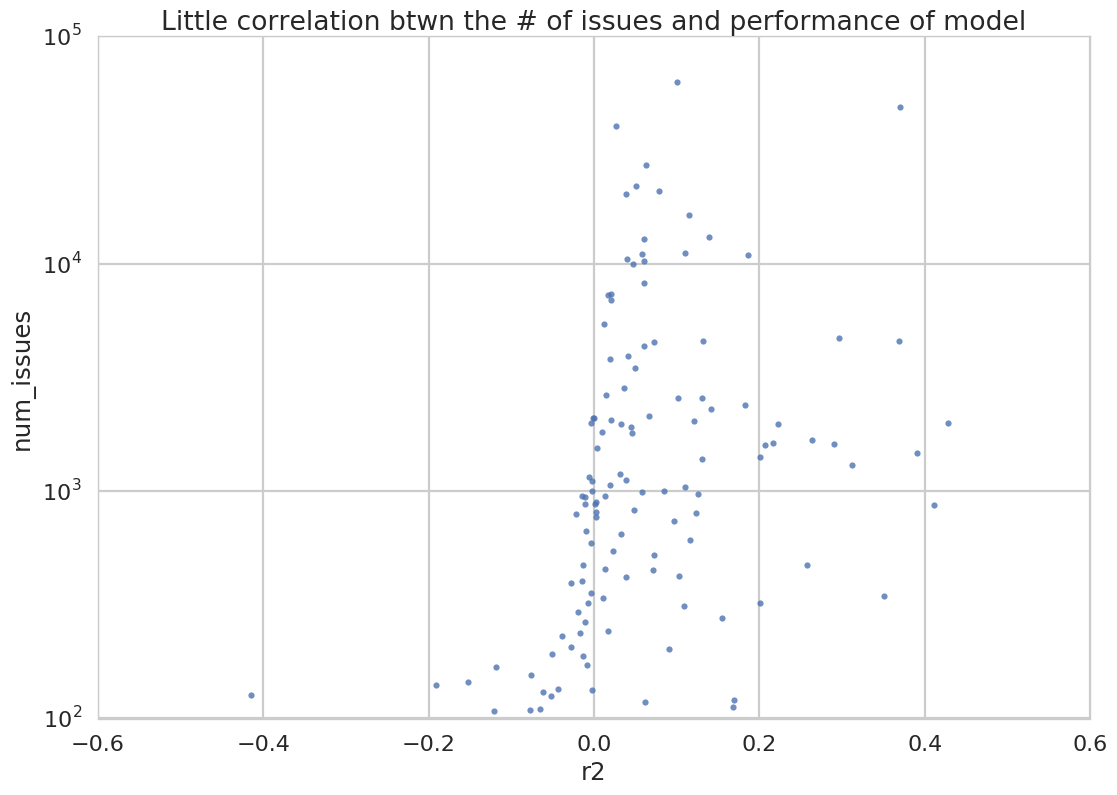

In [59]:
ax = sns.regplot(x='r2', y='num_issues', data=df1, fit_reg=False)
ax.set_yscale('log')
ax.set_title('Little correlation btwn the # of issues and performance of model');

## Can we get RMSE for Recycling Cart Return?

In [17]:
results['Recycling Cart Return']['rmse']

1.0736440111561754

In [19]:
df1['rmse'] = df1.categ.map(lambda x: results[x]['rmse'])
df1.head()

,categ,r2,needs_more_alphas,num_issues,rmse
0,Recycling Cart Return,0.428808,False,1986,1.073644
1,Recycling Cart Inquiry,0.409995,False,867,0.361936
2,Misc. Snow Complaint,0.393860,False,1474,0.672877
3,Request for Snow Plowing,0.370317,True,49135,0.564306
4,Notification,0.368611,False,4599,0.327298


In [22]:
df1[df1.rmse < 0.75].sort_values('r2', ascending=False)

,categ,r2,needs_more_alphas,num_issues,rmse
1,Recycling Cart Inquiry,0.409995,False,867,0.361936
2,Misc. Snow Complaint,0.393860,False,1474,0.672877
3,Request for Snow Plowing,0.370317,True,49135,0.564306
4,Notification,0.368611,False,4599,0.327298
5,Illegal Auto Body Shop,0.350456,False,346,0.747601
8,Electrical,0.290656,False,1605,0.622380
10,Plumbing,0.259117,False,471,0.668490
15,Overflowing or Un-kept Dumpster,0.200968,False,1418,0.615233
16,Work w/out Permit,0.185823,False,2395,0.629426
20,Zoning,0.154914,False,278,0.728633
